# **1. Perkenalan Dataset**


Dataset ini bertujuan untuk membantu membangun model regresi guna memprediksi kemungkinan banjir **(FloodProbability)** berdasarkan 20 variabel independen yang mencerminkan faktor lingkungan dan sosial-ekonomi seperti:

* MonsoonIntensity
* Deforestation
* Urbanization
* ClimateChange

Semua variabel bertipe numerik **(int64)** dan tidak terdapat nilai yang hilang, sehingga dataset ini sangat cocok digunakan untuk model regresi tanpa preprocessing berat.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
# Load dataset dari CSV
df = pd.read_csv("flood.csv")

In [4]:
# Menampilkan beberapa baris awal
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**4.1. Memahami Struktur Data**

In [5]:
print(df.info())  # Struktur dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [6]:
df.describe()  # Statistik deskriptif

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [7]:
df.isnull().sum()  # Mengecek missing values

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

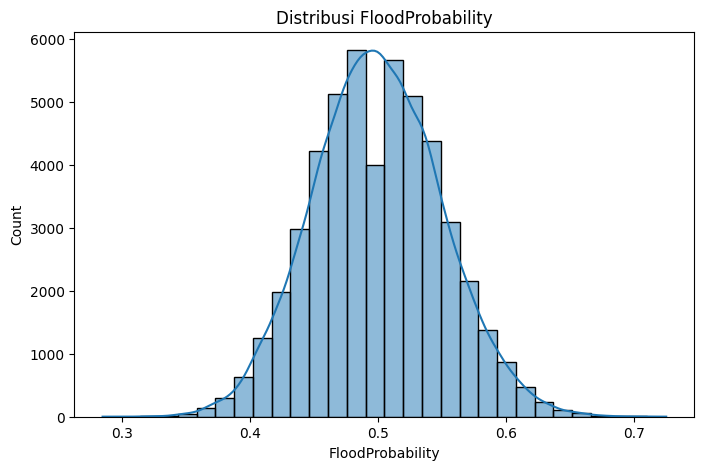

In [8]:
# Distribusi target
plt.figure(figsize=(8, 5))
sns.histplot(df['FloodProbability'], bins=30, kde=True)
plt.title("Distribusi FloodProbability")
plt.show()

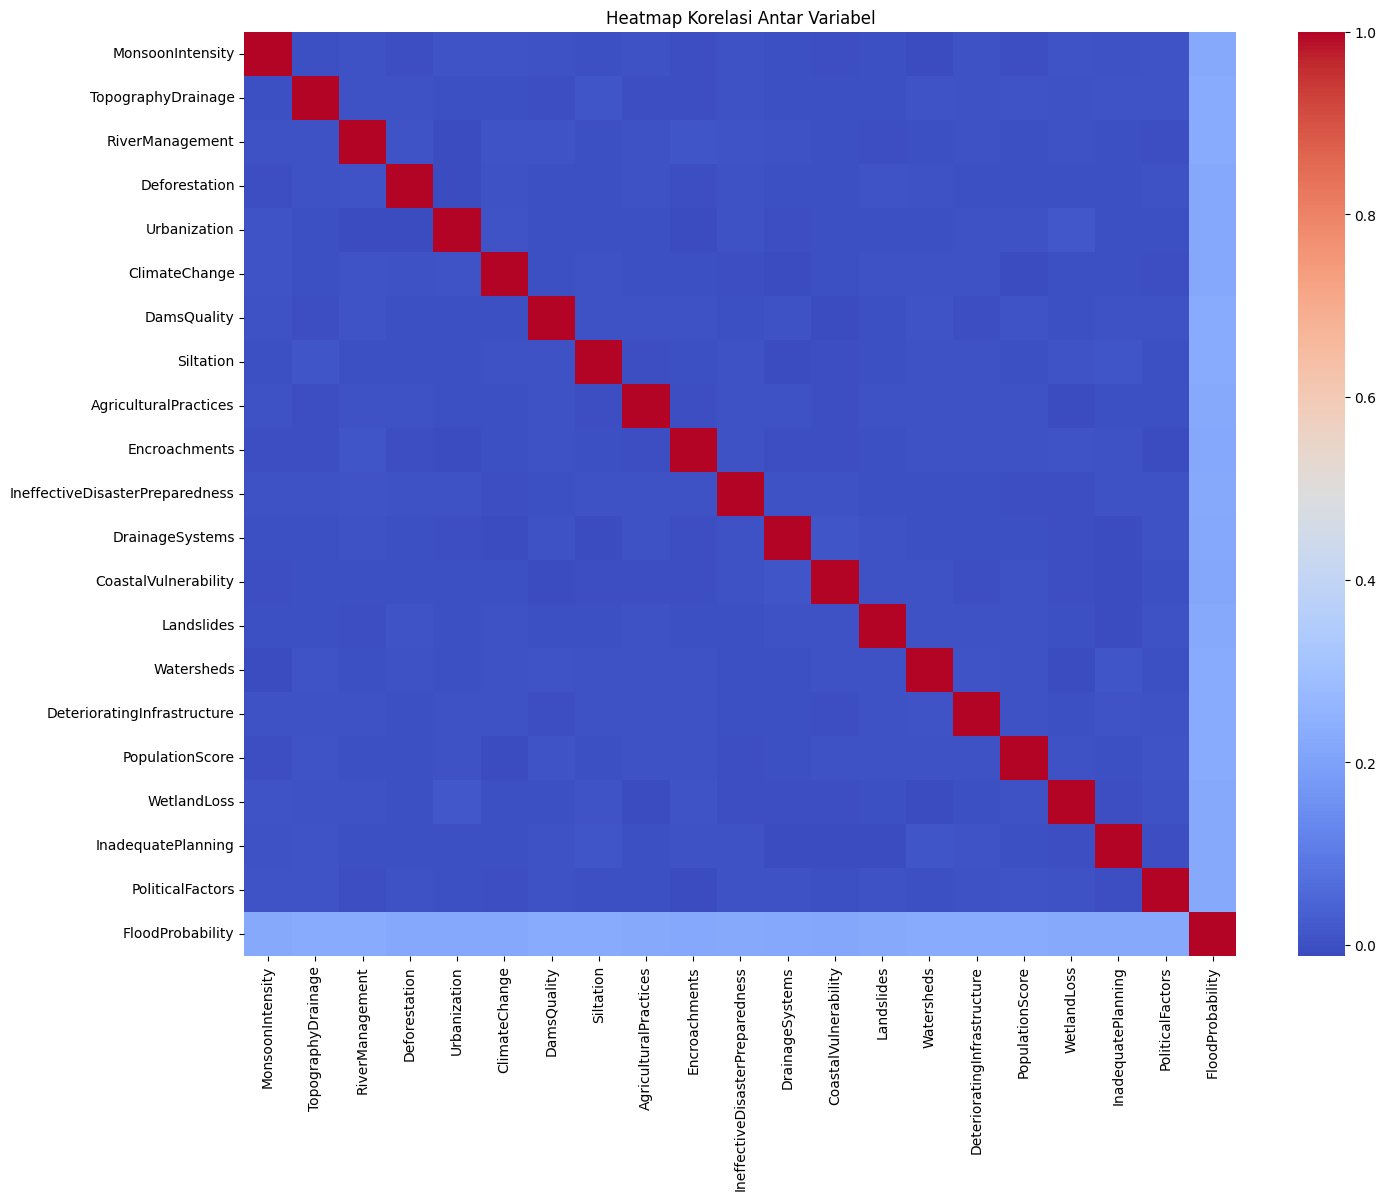

In [9]:
# Korelasi antar fitur
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

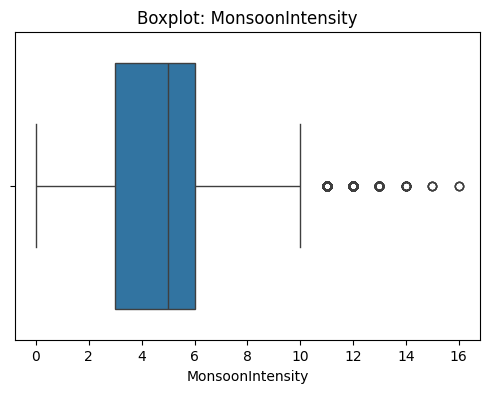

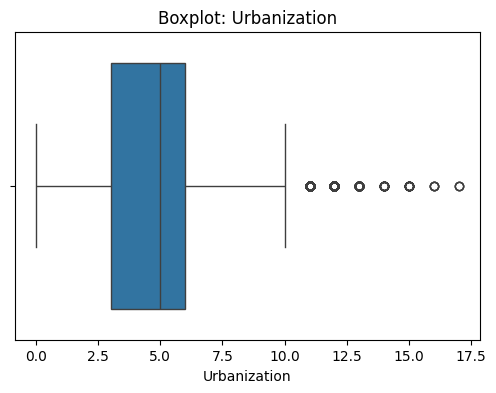

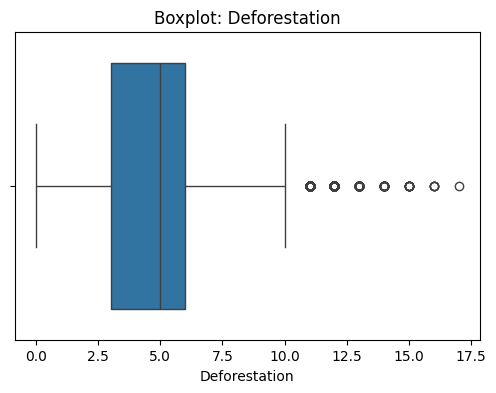

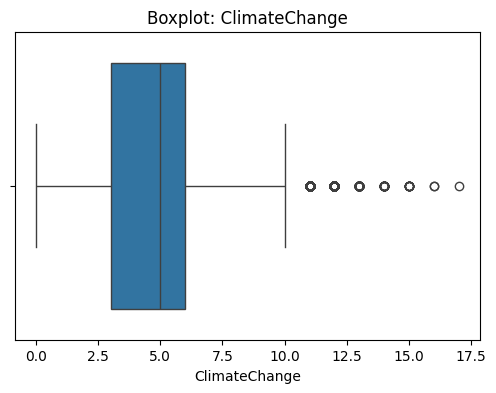

In [10]:
# Boxplot fitur yang paling relevan
features = ['MonsoonIntensity', 'Urbanization', 'Deforestation', 'ClimateChange']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [11]:
# Menghapus missing values
df.duplicated().sum()
df = df.drop_duplicates()

Standarisasi / Normalisasi

In [12]:
X = df.drop(columns='FloodProbability')
y = df['FloodProbability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled

array([[-0.89032073,  1.34250894,  0.44102779, ..., -0.89845678,
        -1.34276933,  0.44944638],
       [ 1.34500358, -0.43806593, -0.00714386, ...,  1.79003104,
        -1.79120216, -0.88623055],
       [-0.89032073,  2.23279638, -0.45531551, ...,  1.34194973,
        -0.8943365 ,  0.44944638],
       ...,
       [-0.44325587, -0.43806593, -0.00714386, ...,  0.44578713,
        -0.44590367, -0.88623055],
       [-0.44325587,  0.00707779, -0.45531551, ..., -0.45037548,
        -2.23963499,  2.6755746 ],
       [-0.44325587,  0.00707779,  0.44102779, ...,  1.34194973,
         2.24469331,  0.89467203]])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluasi
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
MAE: 2.9820590441431704e-16
MSE: 1.4170961715922172e-31
RMSE: 3.764433784239294e-16
R2 Score: 1.0


In [16]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
print("\nRandom Forest Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))



Random Forest Regressor:
MAE: 0.02047456000000001
MSE: 0.0006711209520000005
RMSE: 0.025906002238863496
R2 Score: 0.7305369013357019


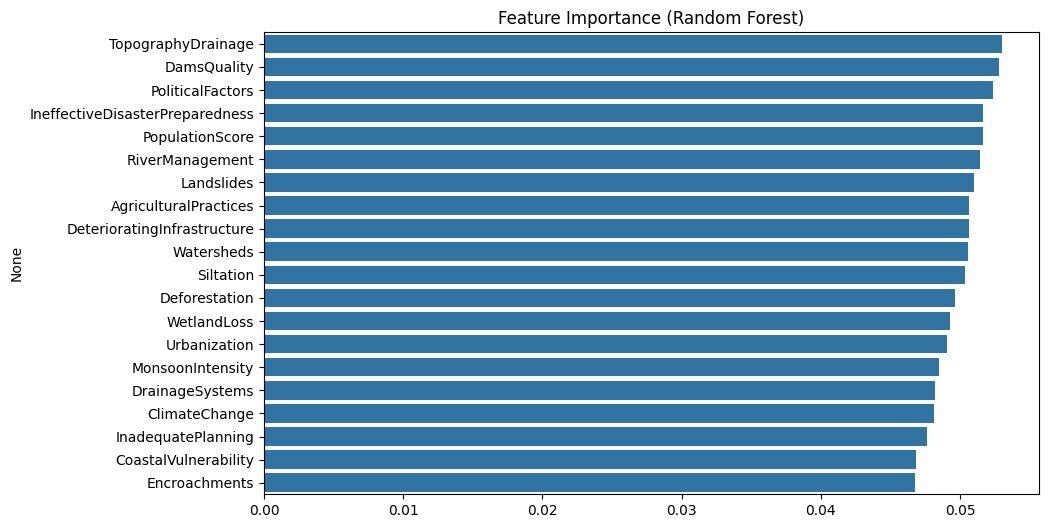

In [21]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = df.drop(columns='FloodProbability').columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance (Random Forest)")
plt.show()

# **7. Tuning Model**

In [18]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Inisiasi model
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit ke data training
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Evaluasi model terbaik
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Random Forest (Tuned):")
print("MAE:", mean_absolute_error(y_test, y_pred_best_rf))
print("MSE:", mean_squared_error(y_test, y_pred_best_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))
print("R2 Score:", r2_score(y_test, y_pred_best_rf))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest (Tuned):
MAE: 0.020374756666666667
MSE: 0.0006664286003333331
RMSE: 0.02581527842835194
R2 Score: 0.7324209367191223


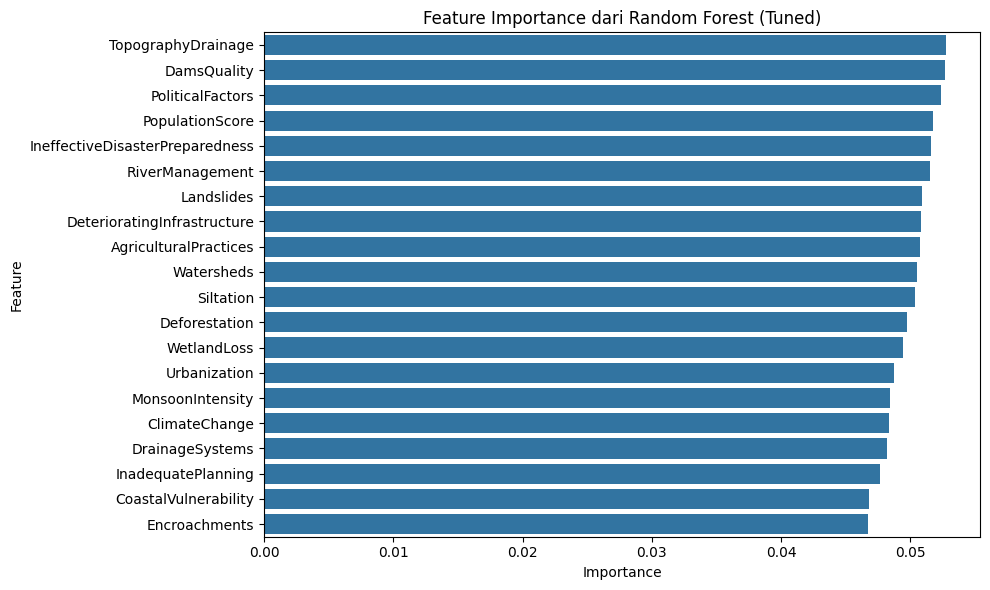

In [23]:
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
features = df.drop(columns='FloodProbability').columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance dari Random Forest (Tuned)")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# **8. Interpretasi dan Insight dari Model**

## 8.1. Hasil Linear Regression

Model Linear Regression menghasilkan skor R² mendekati 1.0, yang menandakan model mampu menjelaskan hampir seluruh variasi dalam data. Hal ini bisa disebabkan karena:

- Korelasi antar variabel input dan target sangat tinggi.
- Data tidak mengandung noise (karena sudah bersih dan tidak ada outlier/missing).
- Hubungan antar variabel bersifat linear.

Namun, perlu waspada terhadap overfitting karena nilai R² yang terlalu tinggi dapat mengindikasikan model terlalu "mengikuti" data. Oleh karena itu, validasi silang atau eksperimen model lain seperti Random Forest menjadi penting.

Sebagai pembanding, model Random Forest Regressor yang digunakan menghasilkan skor evaluasi sebagai berikut:
### Sebelum tuning: 
- MAE: 0.02047
- MSE: 0.00067
- RMSE: 0.02591
- R² Score: 0.7305
### Setelah tuning (Grid SearchCV):
- MAE: 0.02037
- MSE: 0.00067
- RMSE: 0.02582
- R² Score: 0.7324

## Hasilnya:
- Model Random Forest memiliki performa prediksi yang cukup baik, dengan R² sekitar 0.73, menunjukkan bahwa model ini mampu menjelaskan sekitar 73% variasi dalam data.

- Perbedaan performa sebelum dan sesudah tuning sangat kecil, namun tetap menunjukkan adanya peningkatan meskipun marginal. Ini menandakan model cukup stabil.

- MAE dan RMSE yang rendah menunjukkan bahwa kesalahan prediksi juga tergolong kecil.

- Dibandingkan dengan Linear Regression, Random Forest lebih robust terhadap data non-linear dan potensi overfitting, serta memberikan insight tambahan dari feature importance.


## 8.2. Feature Importance dari Random Forest

Berikut adalah 5 fitur terpenting menurut model Random Forest:

1. **TopographyDrainage** – Kemampuan drainase alami yang dipengaruhi oleh topografi suatu wilayah sangat krusial dalam menentukan seberapa cepat air hujan dapat dialirkan atau tertahan. Wilayah dengan kontur yang buruk atau cekungan alami berpotensi menjadi titik genangan, sehingga meningkatkan risiko banjir secara signifikan.
2. **DamsQuality** – Kualitas struktur dan pemeliharaan bendungan sangat memengaruhi pengendalian volume air. Bendungan yang rusak atau tidak dirawat dengan baik berpotensi jebol dan menyebabkan banjir besar. Sebaliknya, bendungan yang baik dapat berfungsi sebagai pengatur aliran air saat hujan lebat.
3. **PoliticalFactors** – Faktor politik seperti korupsi, alokasi anggaran yang tidak tepat, dan lemahnya regulasi menjadi hambatan utama dalam pembangunan serta pemeliharaan infrastruktur pengendalian banjir. Ketidakefisienan birokrasi juga memperburuk mitigasi risiko banjir.
4. **PopulationScore** – Wilayah dengan kepadatan penduduk tinggi cenderung memiliki lebih banyak kerugian saat banjir terjadi. Selain itu, peningkatan jumlah penduduk biasanya diikuti dengan ekspansi urbanisasi yang mengurangi lahan resapan air, memperburuk situasi saat curah hujan ekstrem.
5. **IneffectiveDisasterPreparedness** – Ketidaksiapan dalam menghadapi bencana, seperti tidak adanya sistem peringatan dini, prosedur evakuasi, dan pelatihan masyarakat, memperparah dampak banjir. Fitur ini mencerminkan kurangnya sistem mitigasi yang responsif dan terstruktur.

## 8.3. Rekomendasi Kebijakan

Berdasarkan hasil analisis model dan fitur-fitur paling berpengaruh terhadap probabilitas banjir, berikut beberapa rekomendasi kebijakan yang dapat diterapkan oleh pemerintah dan pemangku kepentingan:

- Perbaiki kualitas dan pemeliharaan bendungan : Lakukan audit rutin dan perbaikan bendungan untuk mengontrol aliran air secara optimal.
- Tingkatkan sistem drainase berbasis topografi :Fokus pada wilayah dengan drainase buruk dan sesuaikan pembangunan dengan kontur alami.
- Perkuat tata kelola dan akuntabilitas politik : Tingkatkan transparansi anggaran dan pemberantasan korupsi dalam proyek infrastruktur.
- Rancang tata ruang berdasarkan kepadatan penduduk : Sediakan jalur evakuasi dan infrastruktur tahan banjir di daerah padat penduduk.
- Perkuat kesiapsiagaan bencana : Bangun sistem peringatan dini, lakukan simulasi rutin, dan bentuk tim tanggap darurat.

## 8.4. Kesimpulan

Model regresi yang dibangun, terutama Random Forest Regressor, berhasil memprediksi probabilitas banjir dengan performa yang baik (R² ≈ 0.73) dan kesalahan prediksi rendah (RMSE ≈ 0.025). Meskipun Linear Regression menunjukkan nilai R² yang sangat tinggi, pendekatan Random Forest lebih dapat diandalkan karena kemampuannya menangkap hubungan non-linear dan memberikan informasi penting mengenai kontribusi masing-masing fitur.

Fitur-fitur seperti TopographyDrainage, DamsQuality, PoliticalFactors, PopulationScore, dan IneffectiveDisasterPreparedness terbukti sangat berpengaruh dalam menentukan risiko banjir. Insight dari model ini dapat dijadikan dasar dalam merancang kebijakan mitigasi banjir yang lebih efektif dan berbasis data.

Dengan demikian, implementasi model prediktif ini memiliki potensi besar sebagai alat bantu pengambilan keputusan berbasis bukti (evidence-based policy) untuk mengurangi risiko dan dampak banjir di masa mendatang.
